In [ ]:
%matplotlib inline
import os
import pymongo
import pandas as pd
db = pymongo.MongoClient(os.environ['MONGO_HOST'])['flirt']


In [ ]:
# Compare total numbers for simulations on various months.
results = list(db.passengerFlows.aggregate([{
   '$match': {
       'arrivalAirport': {
           '$in': ['ATL']
       }
   }
}, {
    '$group': {
        '_id': {"$concat": ["$arrivalAirport", "$simGroup"]},
        'total': { '$sum': "$estimatedPassengers" }
    }
}]))
df = pd.DataFrame(results)
df


In [ ]:
USAirports = [airport['_id'] for airport in db.airports.find({"countryName": "United States"})]
results = list(db.passengerFlows.aggregate([{
   '$match': {
       'simGroup': 'fmd-2017-08',
       'arrivalAirport': {
           '$in': USAirports
       }
   }
}, {
    '$group': {
        '_id': "$arrivalAirport",
        'total': { '$sum': "$estimatedPassengers" }
    }
}]))
df = pd.DataFrame(results)
df


In [ ]:
seatac_dest_oct_2016_rankings = [
    'LAX',
    'SFO',
    'ANC',
    'DEN',
    'LAS',
    'PHX',
    'ORD',
    'PDX',
    'DFW',
    'GEG'
]
results = list(db.passengerFlows.aggregate([{
   '$match': {
       "departureAirport": "SEA",
       "simGroup": {
           "$in": ["fmd-2017-08", "fmd-2017-09"]
       },
       "arrivalAirport": {
           "$in": USAirports
       }
   }
}, {
    '$group': {
        '_id': "$arrivalAirport",
        'total': { '$sum': "$estimatedPassengers" }
    }
}]))
pd.DataFrame(results).sort_values(by="total", ascending=False)


In [32]:
results = db.flights.aggregate([{
    "$group": {
        "_id": {
            "$dateToString": {
                "date": "$departureDateTime",
                "format": "%Y-%m-%d"
            }
        },
        "totalFlights": { "$sum": 1 },
        "totalSeats": { "$sum": "$totalSeats" }
    }
}])
df = pd.DataFrame(list(results))
df

TypeError: data argument can't be an iterator

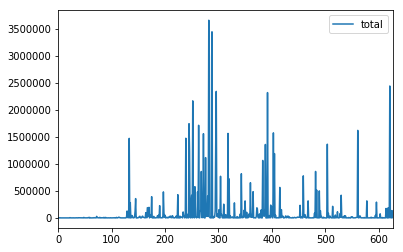

In [38]:
df.plot()